In [13]:
import numpy as np
import os
import sys
from textwrap import wrap
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation, Concatenate, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [19]:
img_path = '/home/devcontainers/Deep_Learning/RNN/image_caption/Flicker8k_Dataset'
caption_path = '/home/devcontainers/Deep_Learning/RNN/image_caption/Flickr8k.token.txt'
caption = pd.read_csv(caption_path, sep='\t', header=None, names=['image', 'caption'])
caption['image_clean'] = caption['image'].str.split('#').str[0]
caption.head()

,image,caption,image_clean
0,1000268201_693b08cb0e.jpg#0,A child in a pink dress is climbing up a set o...,1000268201_693b08cb0e.jpg
1,1000268201_693b08cb0e.jpg#1,A girl going into a wooden building .,1000268201_693b08cb0e.jpg
2,1000268201_693b08cb0e.jpg#2,A little girl climbing into a wooden playhouse .,1000268201_693b08cb0e.jpg
3,1000268201_693b08cb0e.jpg#3,A little girl climbing the stairs to her playh...,1000268201_693b08cb0e.jpg
4,1000268201_693b08cb0e.jpg#4,A little girl in a pink dress going into a woo...,1000268201_693b08cb0e.jpg


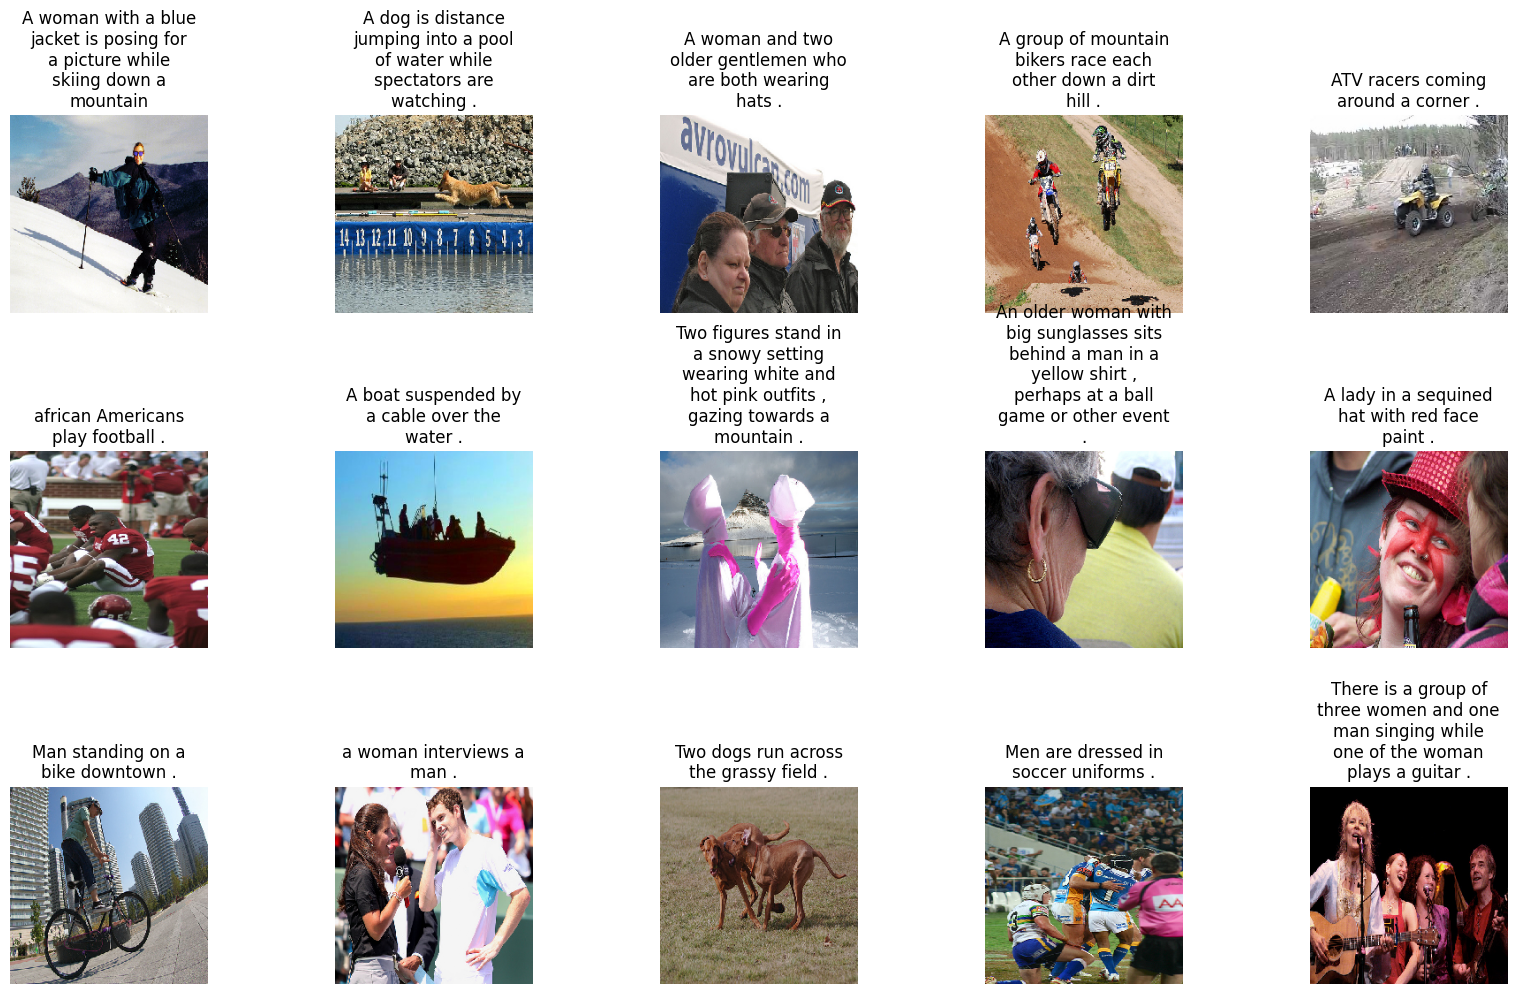

In [31]:
def read_image(image_path):
    img = load_img(image_path, color_mode='rgb', target_size=(224, 224))
    img = img_to_array(img)
    # img = np.expand_dims(img, axis=0)
    # img = preprocess_input(img)
    img /= 255.0
    return img

def display_image(image_df):
    image_df = image_df.reset_index(drop=True)
    plt.figure(figsize=(20,20))
    i=0
    for i in range(len(image_df)):
        plt.subplot(5,5,i+1)
        plt.subplots_adjust(hspace=0.7, wspace=0.3)
        img = read_image(os.path.join(img_path, image_df.image_clean[i]))
        plt.imshow(img)
        plt.title("\n".join(wrap(image_df.caption[i], 20)))
        plt.axis('off')

display_image(caption.sample(15))